## Challenge Exercise 4 (CE4)

### Due on 10/15/25 @ 11:55 pm EST (see Canvas Assignment)

****

## Collaboration policy

This is a group assignment. **The maximum number of students per group is three**. There are no existing group assignments. Additionally, you may choose any classmate (i.e., the overlap criteria have been reset).

Please be welcoming and kind, and invite students you may not know well (i.e., be a good classmate). If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.

In the markdown cell below, put the full name of each person in your group.

### Team members

1. Thomas You
2. Yuyang Deng


****
## AI policy

AI may not be used to generate a coding solution. Your solution must be your own work. If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.




****
## Honor pledge

To acknowledge and understand the **Collaboration and AI policies** outlined above, each team member must enter their Onyen and PID in this markdown cell.

1. youz, 730679279
2. dyy12, 730660498

****

## Python modules

All the Python modules needed to complete this CE are provided to you. 

<span style="background-color: #FFFF00">**No other modules are authorized** and **if other modules are added points will be deducted**.</span>

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as acc
from scipy.optimize import minimize
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

****

### Identifying TLE biomarkers in neurological data.

<img src="scgm_structures.png" width="400" style="float: right"/>

The Enigma dataset examines differences between the healthy brain and the brain of a patient with temporal lobe epilepsy (TLE) by analyzing subcortical gray matter structures.

The dataset has the following fields:
- Diagnosis label where 0= healthy and 1=TLE (`Dx`)
- Surface area ($mm^2$) of the left and right thalamus (`L_thal` and `R_thal`).
- Surface area ($mm^2$) of the left and right caudate nucleus (`L_caud` and `R_caud`).
- Surface area ($mm^2$) of the left and right putamen (`L_put and R_put`).
- Surface area ($mm^2$) of the left and right pallidum (`L_pal` and `R_pal`).
- Surface area ($mm^2$) of the left and right hippocampus (`L_hippo` and `R_hipp`).

Tips:
- This numpy <a href="https://numpy.org/doc/stable/user/absolute_beginners.html">tutorial</a> may be helpful.
- This dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">selecting, slicing, and extracting tutorial</a> may be helpful.
- This datafame <a href="https://www.geeksforgeeks.org/python/filter-pandas-dataframe-with-multiple-conditions/">conditional filtering tutorial</a> maybe be helpful.
- The data visualization notebook (see Canvas schedule, 8/21) may be helpful.
- The data representation slides (see Canvas schedule) may be helpful.
- The performance evaluation slides (see Canvas schedule) may be helpful.
- The introduction to supervised learning slides (see Canvas schedule) may be helpful.
- The regression slides (see Canvas schedule) may be helpful.
- The classification slides (see Canvas schedule) may be helpful.

****

In [153]:
df = pd.read_csv("enigma.csv")
df

,Dx,L_thal,R_thal,L_caud,R_caud,L_put,R_put,L_pal,R_pal,L_hippo,R_hippo,L_amyg,R_amyg
0,0,7829.0,7568.0,3301.0,3694.0,4942.0,5403.0,1627.0,1920.0,3927.0,3844.0,1442.0,1409.0
1,0,7567.0,7578.0,3467.0,3494.0,5282.0,5255.0,1769.0,1670.0,4657.0,4582.0,1596.0,1595.0
2,0,7823.0,8228.0,4218.0,4092.0,5473.0,5562.0,1876.0,1450.0,4909.0,4497.0,1550.0,1460.0
3,0,8022.0,8030.0,3892.0,3789.0,5220.0,5510.0,1663.0,1655.0,4551.0,4606.0,1554.0,1594.0
4,0,8443.0,7831.0,4291.0,4400.0,6516.0,6326.0,1915.0,1881.0,4619.0,4338.0,1752.0,1795.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,1,6808.2,6034.1,2871.5,3018.9,5251.6,4940.2,1255.0,1182.4,3801.8,3737.1,1697.7,1913.7
1232,1,7466.2,6745.6,3289.1,3524.0,5236.6,5737.7,1467.4,1505.2,3283.6,4356.0,1456.1,1472.2
1233,1,8123.5,6577.2,4253.8,4485.0,5199.6,5815.4,1523.6,1605.8,4486.9,4911.1,1729.8,1994.2
1234,1,9480.4,6428.7,4080.6,4283.0,4822.9,5902.5,1163.5,1362.4,3559.1,4128.0,1522.9,2447.7


****

**P1** (5 Points): Data Visualization.

<img src="p1.png" width="600" style="float: right"/>

Create a combined scatter plot that visualizes the relationships between subcortical gray matter structures.
- `Left Hippocampus` and `Right Hippocampus`, 
- `Left Caudate Nucleus` and `Right Caudate Nucleus`, 

To receive full credit, your new dataframe must generate scatter plots identical to the ones provided.

You may assume:
- All the data (in your dataframe) is used to generate these scatter plots.
- The colors used to generate plots are blue (healthy) and red (TLE).
- The plot figure size is 10 inches in width and 5 inches in height.
- The plot figure uses a tight layout.
- The default x-axis, y-axis, and z-axis tick values are used.
- The scatter plot marker size is 30.
- The alpha (opacity) value is 0.25.




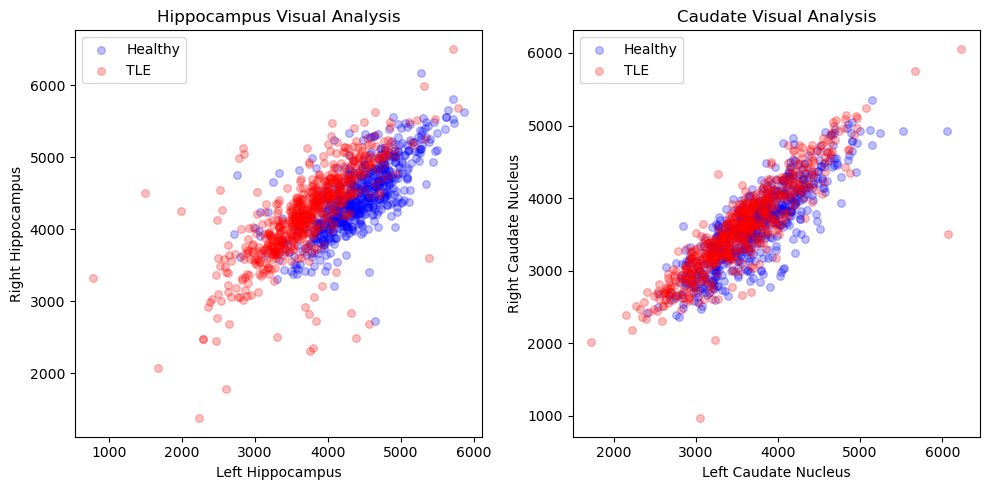

In [154]:
# --------------------------------------
# Add your P1 coding solution below.
# --------------------------------------

sub = df[['Dx', 'L_hippo', 'R_hippo', 'L_caud', 'R_caud']]
h = sub['Dx'] == 0
t = sub['Dx'] == 1

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(sub.loc[h, 'L_hippo'], sub.loc[h, 'R_hippo'], s=30, alpha=0.25, c='blue', label='Healthy')
axs[0].scatter(sub.loc[t, 'L_hippo'], sub.loc[t, 'R_hippo'], s=30, alpha=0.25, c='red', label='TLE')
axs[0].set_title('Hippocampus Visual Analysis')
axs[0].set_xlabel('Left Hippocampus')
axs[0].set_ylabel('Right Hippocampus')
axs[0].legend()

axs[1].scatter(sub.loc[h, 'L_caud'], sub.loc[h, 'R_caud'], s=30, alpha=0.25, c='blue', label='Healthy')
axs[1].scatter(sub.loc[t, 'L_caud'], sub.loc[t, 'R_caud'], s=30, alpha=0.25, c='red', label='TLE')
axs[1].set_title('Caudate Visual Analysis')
axs[1].set_xlabel('Left Caudate Nucleus')
axs[1].set_ylabel('Right Caudate Nucleus')
axs[1].legend()

plt.tight_layout()
plt.show()

****

<img src="p2.png" width="500" style="float: right"/>

**P2** (10 Points): Gradient descent optimized logistic regression model.

Using the dataframe, this question will construct and evaluate a logistic regression classification model that predicts the label (Healthy and TLE) based on the surface area measurements of the right and left hippocampus. The gradient descent method will be used to estimate the optimal parameters. You can write your own iterative solution or use the SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">minimize</a> function (see authorized Python modules above).

Before model construction and evaluation, the data will be randomly shuffled and then partitioned into two sets using an 80/20 split. Specifically, 80% of the data will be used to train, and 20% will be reserved for testing. 

The accuracy (ACC) measure for both the training and testing data sets is reported in the plot title. These may be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">accuracy_score</a> function (see authorized Python modules above).

To receive full credit, your solution must generate a plot similar to the reference plot. <span style="background-color: #FFFF00">**Note**: because the data is randomly shuffled each time the cell is run, your plot and measures will be slightly different than those provided in the reference plot.</span>

You may assume:
- Only the training data is used to generate the scatter plots.
- The colors used to generate plots are blue (Healthy), red (TLE), and green (fitted decision boundary).
- The default x-axis, y-axis, and z-axis tick values are used.
- You choose the free parameters (e.g., learning rate ($\alpha$), regularization ($\lambda$), iterations ($N$)).
- The scatter plot marker size is 30.
- The alpha (opacity) value is 0.25.
- The method parameter used in the minimize function is L-BFGS-B.


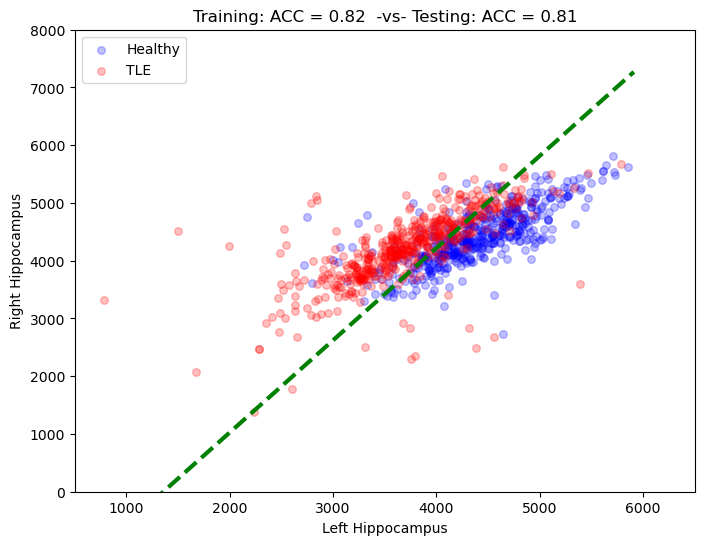

In [ ]:
# --------------------------------------
# Add your P2 coding solution below.
# --------------------------------------

# split data 80/20
np.random.seed(562)
data = df[['L_hippo', 'R_hippo', 'Dx']].copy()
data = data.sample(frac=1).reset_index(drop=True)  # shuffling using the sample() function

n_train = int(0.8 * len(data))
train_data = data[:n_train]
test_data = data[n_train:]

X_train = train_data[['L_hippo', 'R_hippo']].values
y_train = train_data['Dx'].values
X_test = test_data[['L_hippo', 'R_hippo']].values  
y_test = test_data['Dx'].values

X_train_with_bias = np.column_stack([np.ones(X_train.shape[0]), X_train])
X_test_with_bias = np.column_stack([np.ones(X_test.shape[0]), X_test])

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

def logistic_loss(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

def logistic_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    grad = (1/m) * X.T @ (h - y)
    return grad

initial_theta = np.zeros(X_train_with_bias.shape[1])
result = minimize(logistic_loss, initial_theta, args=(X_train_with_bias, y_train), jac=logistic_gradient, method='L-BFGS-B')
theta = result.x

train_pred_probs = sigmoid(X_train_with_bias @ theta)
test_pred_probs = sigmoid(X_test_with_bias @ theta)
train_pred = (train_pred_probs >= 0.5).astype(int)
test_pred = (test_pred_probs >= 0.5).astype(int)

train_acc = acc(y_train, train_pred)
test_acc = acc(y_test, test_pred)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
healthy_mask = y_train == 0
tle_mask = y_train == 1

ax.scatter(X_train[healthy_mask, 0], X_train[healthy_mask, 1], s=30, alpha=0.25, c='blue', label='Healthy')
ax.scatter(X_train[tle_mask, 0], X_train[tle_mask, 1],  s=30, alpha=0.25, c='red', label='TLE')

x_min, x_max = ax.get_xlim()
x_range = np.linspace(x_min + 200, x_max - 200, 100)
y_boundary = -(theta[0] + theta[1] * x_range) / theta[2]
ax.plot(x_range, y_boundary, 'g--', linewidth=3)

ax.set_xlabel('Left Hippocampus')
ax.set_ylabel('Right Hippocampus') 
ax.set_ylim(bottom=0, top=8000)
ax.set_xlim(left = 500, right= 6500)
ax.set_title(f'Training: ACC = {train_acc:.2f}  -vs- Testing: ACC = {test_acc:.2f}')
ax.legend()
plt.show()


****

<img src="p3.png" width="500" style="float: right"/>

**P3** (10 Points): Stochastic gradient descent optimized logistic regression model.

Using the dataframe, this question will construct and evaluate a logistic regression classification model that predicts the label (Healthy and TLE) based on the surface area measurements of the right and left caudate nucleus. The stochastic gradient descent method will be used to estimate the optimal parameters. You can write your own iterative solution or use the SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">minimize</a> function (see authorized Python modules above).

Before model construction and evaluation, the data will be randomly shuffled and then partitioned into two sets using an 80/20 split. Specifically, 80% of the data will be used to train, and 20% will be reserved for testing. 

The accuracy (ACC) measure for both the training and testing data sets is reported in the plot title. These may be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">accuracy_score</a> function (see authorized Python modules above).

To receive full credit, your solution must generate a plot similar to the reference plot. <span style="background-color: #FFFF00">**Note**: because the data is randomly shuffled each time the cell is run, your plot and measures will be slightly different than those provided in the reference plot.</span>

You may assume:
- Only the training data is used to generate the scatter plots.
- The colors used to generate plots are blue (Healthy), red (TLE), and green (fitted decision boundary).
- The default x-axis, y-axis, and z-axis tick values are used.
- You choose the free parameters (e.g., learning rate ($\alpha$), regularization ($\lambda$), iterations ($N$)).
- The scatter plot marker size is 30.
- The alpha (opacity) value is 0.25.
- The method parameter used in the minimize function is SLSQP.
- A 5% random sample is used in the gradient calculation.


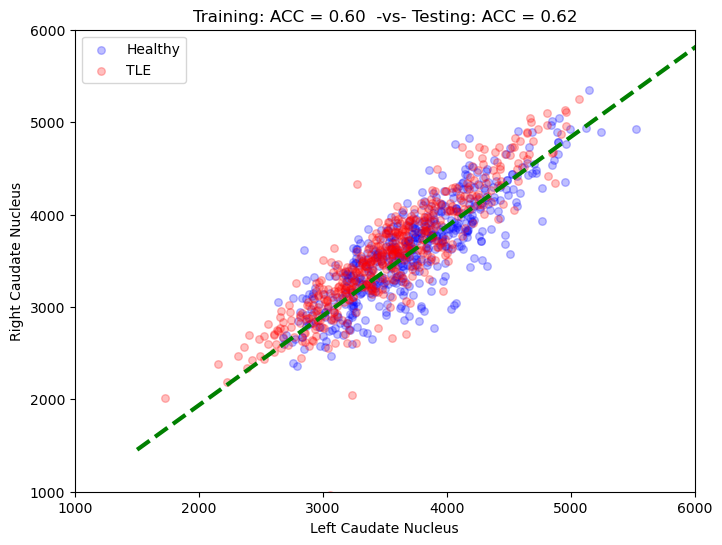

In [ ]:
# --------------------------------------
# Add your P3 coding solution below.
# --------------------------------------
data = df[['L_caud', 'R_caud', 'Dx']].copy()
data = data.sample(frac=1).reset_index(drop=True)

train_size = int(0.8 * len(data)) # 80/20
train_set = data[:train_size]
test_set = data[train_size:]

X_train = train_set[['L_caud', 'R_caud']].values
y_train = train_set['Dx'].values
X_test = test_set[['L_caud', 'R_caud']].values
y_test = test_set['Dx'].values

X_train_bias = np.column_stack([np.ones(X_train.shape[0]), X_train])
X_test_bias = np.column_stack([np.ones(X_test.shape[0]), X_test])

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

# Stochastic Gradient Descent
def sgd_loss(weights, X, y):
    sample_size = max(1, int(0.05 * len(X)))
    indices = np.random.choice(len(X), sample_size, replace=False)
    X_sample = X[indices]
    y_sample = y[indices]

    z = X_sample @ weights
    h = sigmoid(z)

    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    loss = -(1/sample_size) * np.sum(y_sample * np.log(h) + (1-y_sample) * np.log(1-h))
    
    return loss

def sgd_grad(weights, X, y):
    sample_size = max(1, int(0.05 * len(X)))
    indices = np.random.choice(len(X), sample_size, replace=False)
    X_sample = X[indices]
    y_sample = y[indices]
    
    z = X_sample @ weights
    h = sigmoid(z)
    gradient = (X_sample.T @ (h - y_sample)) / sample_size
    
    return gradient

np.random.seed(456)
initial_weights = np.zeros(X_train_bias.shape[1])
result = minimize(sgd_loss, initial_weights, args=(X_train_bias, y_train), jac=sgd_grad, method='SLSQP')
weights = result.x

train_probabilities = sigmoid(X_train_bias @ weights)
test_probabilities = sigmoid(X_test_bias @ weights)
train_predictions = (train_probabilities >= 0.5).astype(int)
test_predictions = (test_probabilities >= 0.5).astype(int)
train_accuracy = acc(y_train, train_predictions)
test_accuracy = acc(y_test, test_predictions)


fig, ax = plt.subplots(figsize=(8, 6))
healthy_indices = y_train == 0
tle_indices = y_train == 1

ax.scatter(X_train[healthy_indices, 0], X_train[healthy_indices, 1], s=30, alpha=0.25, c='blue', label='Healthy')
ax.scatter(X_train[tle_indices, 0], X_train[tle_indices, 1], s=30, alpha=0.25, c='red', label='TLE')

x_limits = ax.get_xlim()
x_values = np.linspace(x_limits[0], x_limits[1], 100)
y_values = -(weights[0] + weights[1] * x_values) / weights[2]
ax.plot(x_values, y_values, 'g--', linewidth=3)

ax.set_xlabel('Left Caudate Nucleus')
ax.set_ylabel('Right Caudate Nucleus')
ax.set_ylim(bottom=1000, top=6000)
ax.set_xlim(left=1000, right=6000)
ax.set_title(f'Training: ACC = {train_accuracy:.2f}  -vs- Testing: ACC = {test_accuracy:.2f}')
ax.legend()
plt.show()
